# BÁO CÁO BÀI TẬP THỰC HÀNH VÀ ĐỒ ÁN CUỐI KỲ

- Dành cho lớp CS114.O21 và CS114.O21.KHCL

## THÔNG TIN NHÓM

- Mỗi SV của nhóm điền các thông tin như bên dưới

1. 22521184
  - Họ và Tên: Nguyễn Đình Quân
  - Số buổi vắng: 0
  - Số bài tập quá trình: 9
  - Điểm WeCode: 2608

2. 22521031
  - Họ và Tên: Trần Vũ Nhật
  - Số buổi vắng: 0
  - Số bài tập quá trình: 9
  - Điểm WeCode: 2666
3. 22520197
  - Họ và Tên: Võ Nguyên Đăng
  - Số buổi vắng: 1
  - Số bài tập quá trình: 8
  - Điểm WeCode: 2852
4. 22520658
  - Họ và Tên: Văn Quốc Khánh
  - Số buổi vắng: 1
  - Số bài tập quá trình: 8
  - Điểm WeCode: 2268

### 4. Dự đoán điểm

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
annonimized_df = pd.read_csv('annonimized.csv')
annonimized_df.head()

,"concat('it001',`assignment_id`)","concat('it001',`problem_id`)","concat('it001', username)",is_final,status,pre_score,coefficient,"concat('it001',`language_id`)",created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."


In [ ]:
annonimized_df.rename(columns={"concat('it001',`assignment_id`)" : "assignment_id",
                               "concat('it001',`problem_id`)" : "problem_id",
                               "concat('it001', username)" : "username",
                               "concat('it001',`language_id`)" : "language_id"}, inplace=True)

annonimized_df.head()

,assignment_id,problem_id,username,is_final,status,pre_score,coefficient,language_id,created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."


Các đặc trưng rút trích
- Số problem đã nộp
- Số problem giải được
- Trung bình số lần nộp mỗi problem
- Số lần SCORE
- Số lần Compilation Error
- Số lần pending
- Số lần Syntax Error
- Trung bình hệ số điểm
- Số lần nộp bài trễ

In [ ]:
new_df = {
    'username' : [],
    'problem_amount' : [],
    'solved_amount' : [],
    'average_submits_per_problem' : [],
    'SCORE_times' : [],
    'Compilation_Error_times' : [],
    'pending_times' : [],
    'Syntax_Error_times' : [],
    'average_pre_score' : [],
    'late_submits_amount' : []
}

In [ ]:
users = annonimized_df['username'].unique()

for user in users:
    new_df['username'].append(user)

    submits = annonimized_df[annonimized_df['username'] == user]

    new_df['problem_amount'].append(len(set(zip(submits['assignment_id'], submits['problem_id']))))
    new_df['solved_amount'].append(len(submits[submits['judgement'].str.contains(r'\"verdicts\":\[\]')]))
    new_df['average_submits_per_problem'].append(submits.groupby(['assignment_id', 'problem_id']).size().reset_index(name='count')['count'].mean())
    new_df['SCORE_times'].append(len(submits[submits['status'] == 'SCORE']))
    new_df['Compilation_Error_times'].append(len(submits[submits['status'] == 'Compilation Error']))
    new_df['pending_times'].append(len(submits[submits['status'] == 'pending']))
    new_df['Syntax_Error_times'].append(len(submits[submits['status'] == 'Syntax Error']))

    average_pre_score = submits.groupby(['assignment_id', 'problem_id'])['pre_score'].mean().reset_index(name='average_pre_score')['average_pre_score'].mean()
    if pd.isnull(average_pre_score):
        average_pre_score = 0
    new_df['average_pre_score'].append(average_pre_score)
    new_df['late_submits_amount'].append(len(submits[submits['coefficient'] != 100]))


In [ ]:
new_df = pd.DataFrame(new_df)
new_df[15:20]

,username,problem_amount,solved_amount,average_submits_per_problem,SCORE_times,Compilation_Error_times,pending_times,Syntax_Error_times,average_pre_score,late_submits_amount
15,60c257442a0ef9aa6eb039f58c40be980bfe58b7,65,61,5.138462,213,121,0,0,4942.085540,0
16,4cd092562ee4a06eb01e8bd1e9cb7e169fc38c92,75,75,3.573333,253,15,0,0,7102.496525,19
17,40d6052a7ccec94dae8348e5249381afabbbc985,68,48,2.264706,122,32,0,0,6840.002895,0
18,e2ed5ffddf1e60198f9f138810f84b7107ca0561,16,12,2.312500,28,9,0,0,7047.732738,0
19,8554d1155712da4bc72ec5921db3227311265359,110,107,3.836364,357,65,0,0,6459.326562,0


In [ ]:
ck_df = pd.read_csv('ck-public.csv')
ck_df.head()

,hash,CK
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,5.5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,6.5
2,01122b3ef7e59b84189e65985305f575d6bdf83c,4.5
3,013de369c439ab0ead8aa7da64423aa395a8be39,5.0
4,014c59c6433fd764a0b08de6ffeb757eaf60aa73,4.0


In [ ]:
ck_df.rename(columns={'hash' : 'username'}, inplace=True)

train_data = new_df[new_df['username'].isin(ck_df['username'])].merge(ck_df, on='username', how='inner')

X_train = train_data.drop(['CK', 'username'], axis=1)
y_train = train_data['CK']

X_test = new_df[~new_df['username'].isin(ck_df['username'])]

In [ ]:
train_data.to_csv('ck-train.csv', index=False) # Lưu lại file train
X_test.to_csv('ck-test.csv', index=False) # Lưu lại file test

In [ ]:
train_df = pd.read_csv('ck-train.csv')
train_df.head()

,username,problem_amount,solved_amount,average_submits_per_problem,SCORE_times,Compilation_Error_times,pending_times,Syntax_Error_times,average_pre_score,late_submits_amount,CK
0,0bd2037bf68a97753e5e67ab55dac026a649f279,54,48,4.074074,163,57,0,0,6461.474108,0,1.0
1,83e4ca230ab9b35d221d09d335850af44966b772,2,0,1.500000,2,1,0,0,1730.500000,0,6.0
2,0dfa65b4dafad47b15abbfd6c6ce1aeb213901cf,23,10,5.086957,56,61,0,0,2305.950725,0,2.0
3,67d64015616b9e7f49e213890b7b93a2f8796f07,118,125,3.855932,394,61,0,0,6903.554350,0,7.5
4,18fc5492e3a88861f35c23bbb2805f724c1a135a,46,59,3.043478,123,17,0,0,7400.307723,11,7.0


In [ ]:
train_df.applymap(lambda x: type(x) == str).sum()

username                       761
problem_amount                   0
solved_amount                    0
average_submits_per_problem      0
SCORE_times                      0
Compilation_Error_times          0
pending_times                    0
Syntax_Error_times               0
average_pre_score                0
late_submits_amount              0
CK                               0
dtype: int64

In [ ]:
train_df.dropna(axis=0, inplace=True)
# mask = train_df.applymap(lambda x: '\xa0' in str(x)).any(axis=1)
# train_df = train_df[~mask]
train_df.shape

(755, 11)

In [ ]:
X_train_val = train_df.drop(['username', 'CK'], axis=1)
y_train_val = train_df['CK']

In [ ]:
# Feature scaling
scaler = StandardScaler()
scale_col = ['problem_amount', 'solved_amount', 'SCORE_times', 'Compilation_Error_times', 'average_pre_score']
X_train_val[scale_col] = scaler.fit_transform(X_train_val[scale_col])
X_train_val.head()

,problem_amount,solved_amount,average_submits_per_problem,SCORE_times,Compilation_Error_times,pending_times,Syntax_Error_times,average_pre_score,late_submits_amount
0,-0.375010,-0.488854,4.074074,-0.019223,0.361121,0,0,-0.172717,0
1,-1.928060,-1.817793,1.500000,-1.509416,-1.064214,0,0,-3.110504,0
2,-1.300867,-1.540931,5.086957,-1.009600,0.462930,0,0,-2.753167,0
3,1.536435,1.642985,3.855932,2.118880,0.462930,0,0,0.101801,0
4,-0.613941,-0.184306,3.043478,-0.389457,-0.656975,0,0,0.410269,11


In [ ]:
y_train_val = y_train_val.apply(lambda x: pd.to_numeric(x)) # Chuyển từ kiểu string sang kiểu số

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42) # Chia tập train, tập valiadtion

In [ ]:
X_test = pd.read_csv('ck-test.csv')
X_test.head()

,username,problem_amount,solved_amount,average_submits_per_problem,SCORE_times,Compilation_Error_times,pending_times,Syntax_Error_times,average_pre_score,late_submits_amount
0,ed9eaeb6a707f50154024b24d7efcb874a9795dd,58,59,2.396552,105,34,0,0,7302.727641,0
1,ba12c0a2cb367af0467e479c03507c71a805d291,117,123,2.726496,245,74,0,0,7388.596152,0
2,b7298b0fe50443a623af9b56792b330c2d052845,110,109,2.245455,211,36,0,0,7807.097655,0
3,c60be70309789b39355dc612f36e37090ccad5dc,83,76,2.072289,146,26,0,0,7927.700287,0
4,a22a58c5be8aa2c2700619e37f2b7a6e4efa7e6b,103,109,2.796117,250,38,0,0,7464.602271,0


In [ ]:
X_test[scale_col] = scaler.transform(X_test[scale_col])

#### Random forest

In [ ]:
# Khởi tạo mô hình RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Thiết lập lưới tham số (parameter grid)
param_grid = {
    'n_estimators': [50, 75, 100, 125],
    'max_depth': [6, 8, 10, 12],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Thiết lập GridSearchCV
clf = GridSearchCV(rf, param_grid, cv=5, scoring=make_scorer(r2_score))

In [ ]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [6, 8, 10, 12],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [50, 75, 100, 125]},
             scoring=make_scorer(r2_score))

In [ ]:
clf.best_score_

0.13418515045863083

In [ ]:
clf.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 50}

In [ ]:
print(f"Train r2_score: {r2_score(y_train, clf.best_estimator_.predict(X_train))}")
print(f"Val r2_score: {r2_score(y_val, clf.best_estimator_.predict(X_val))}")

Train r2_score: 0.5055030662949218
Val r2_score: 0.2258727732758149


#### SVM

In [ ]:
model = SVR()
model.fit(X_train, y_train)
print(f"Train r2_score: {r2_score(y_train, model.predict(X_train))}")
print(f"Val r2_score: {r2_score(y_val, model.predict(X_val))}")

Train r2_score: 0.13297728175358137
Val r2_score: 0.11134012912425006


#### MLP

In [ ]:
# Tạo một model Sequential ví dụ
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1)
])

# Compile model sử dụng metric là R²
model.compile(optimizer='adam',
              loss='mean_squared_error',)

In [ ]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
19/19 [==============================] - 2s 5ms/step - loss: 26.3144
Epoch 2/100
19/19 [==============================] - 0s 4ms/step - loss: 20.6970
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 16.7146
Epoch 4/100
19/19 [==============================] - 0s 5ms/step - loss: 13.3033
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 10.3848
Epoch 6/100
19/19 [==============================] - 0s 10ms/step - loss: 8.4586
Epoch 7/100
19/19 [==============================] - 0s 5ms/step - loss: 7.3345
Epoch 8/100
19/19 [==============================] - 0s 4ms/step - loss: 6.3891
Epoch 9/100
19/19 [==============================] - 0s 5ms/step - loss: 5.9498
Epoch 10/100
19/19 [==============================] - 0s 4ms/step - loss: 5.5210
Epoch 11/100
19/19 [==============================] - 0s 5ms/step - loss: 5.2238
Epoch 12/100
19/19 [==============================] - 0s 4ms/step - loss: 4.9466
Epoch 13/100
19/19 [===========

In [ ]:
print(f"Train r2_score: {r2_score(y_train, model.predict(X_train))}")
print(f"Val r2_score: {r2_score(y_val, model.predict(X_val))}")

19/19 [==============================] - 0s 4ms/step
Train r2_score: 0.2559827963607575
5/5 [==============================] - 0s 5ms/step
Val r2_score: 0.15318543364480608


In [ ]:
# Lưu kết quả dự đoán file test
result_file = 'ck-result.csv'

for user in X_test['username'].values:
    grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
    with open(result_file, 'a') as file:
        file.write(f'{user}, {grade}\n')

1/1 [==============================] - 0s 20ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 22ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 23ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 22ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 26ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 30ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 23ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 22ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 23ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 28ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 23ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 23ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 26ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 23ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 21ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 23ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 29ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 23ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 23ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 30ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 30ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 23ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 22ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 22ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 35ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 35ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 35ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 32ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 37ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 44ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 34ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 37ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 35ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 37ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 39ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 59ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 35ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - ETA: 0s

<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 28ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 23ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 23ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 34ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - ETA: 0s

<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 23ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 23ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 23ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 26ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 28ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 27ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 39ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 22ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 29ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 37ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 32ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - ETA: 0s

<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - ETA: 0s

<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 22ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 23ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 34ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 29ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 28ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 31ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 35ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 35ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 38ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 32ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 41ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 34ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 46ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 38ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 43ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 35ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 42ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 44ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 38ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 44ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 51ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 44ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 23ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 28ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 23ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 23ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 29ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 22ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - ETA: 0s

<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 32ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 23ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 27ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 32ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 23ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 23ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - ETA: 0s

<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - ETA: 0s

<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 33ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 37ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - ETA: 0s

<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 27ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 23ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 27ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 26ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 27ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 34ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 23ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 26ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 23ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 38ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 34ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 37ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 32ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 46ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 67ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 37ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 35ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 40ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 33ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 35ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 38ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 36ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 36ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 27ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 23ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 23ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 22ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 27ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 29ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 23ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 32ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 22ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 23ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 29ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 34ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 23ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 22ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 27ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 23ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 30ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 33ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 22ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 26ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 26ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 23ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 26ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 38ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - ETA: 0s

<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 46ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 35ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 44ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 34ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 48ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 52ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 39ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 39ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 68ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 40ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 23ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 27ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 29ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - ETA: 0s

<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 26ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 28ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - ETA: 0s

<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 28ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 31ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 22ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 22ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 23ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 28ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 26ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 28ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 30ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 28ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 26ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 31ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 32ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 35ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 26ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - ETA: 0s

<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - ETA: 0s

<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 28ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 38ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 39ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 38ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 48ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 35ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 37ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 35ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 38ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 48ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 39ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 40ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 39ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 51ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 44ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 26ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 30ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 29ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 27ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - ETA: 0s

<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - ETA: 0s

<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 41ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 29ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 32ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 36ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 26ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 31ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 32ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 26ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 27ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 26ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 38ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 26ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 27ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 26ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 38ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 26ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 31ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 29ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 33ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - ETA: 0s

<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 28ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - ETA: 0s

<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 28ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 28ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 26ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 42ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 34ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 41ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 36ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 35ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 38ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 49ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 256ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 39ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 55ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 40ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 36ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 26ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 31ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['use

1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - ETA: 0s

<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 28ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 29ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 32ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 28ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 27ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 29ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 23ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 27ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 29ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 34ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 27ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 26ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 32ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 25ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 26ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 26ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 24ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 26ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))
<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


1/1 [==============================] - 0s 30ms/step


<ipython-input-39-71daba41f155>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grade = float(model.predict(X_test[X_test['username'] == user].drop('username', axis=1)))


## 5. Nhận dạng chữ số viết tay

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/DigitClassification/data/train.csv')
print("Number of images: ", len(train_data))
print(train_data.columns)
train_data.shape

Number of images:  42000
Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


(42000, 785)

In [ ]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = train_data.drop('label', axis=1)
X = X.values.reshape((-1, 28, 28)).astype(np.uint8)
y = train_data[['label']]

print(X.shape)
print(y.shape)

(42000, 28, 28)
(42000, 1)


In [ ]:
def show(items, nrows: int = 1, ncols: int = 1, figsize = None) -> None:
    fig = plt.gcf()
    if figsize is None:
        fig.set_size_inches(ncols * 3, nrows * 3)
    else:
        fig.set_size_inches(figsize[0], figsize[1])
    for i, item in enumerate(items[: nrows * ncols]):
        plt.subplot(nrows, ncols, i + 1)
        ax = plt.gca()
        ax.xaxis.set_major_locator(plt.NullLocator())
        ax.yaxis.set_major_locator(plt.NullLocator())
        image = plt.imread(item) if type(item) is str else np.array(item)
        plt.imshow(image, cmap = None if image.ndim != 2 else 'gray')
    plt.show()

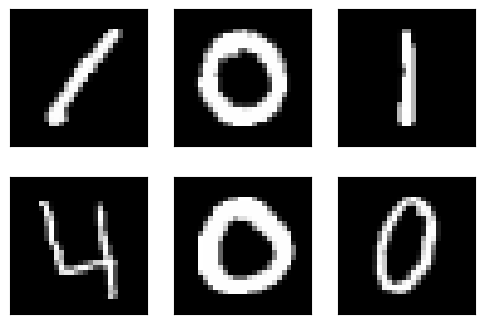

In [ ]:
# Show some digits
show(X, 2, 3, (6, 4))

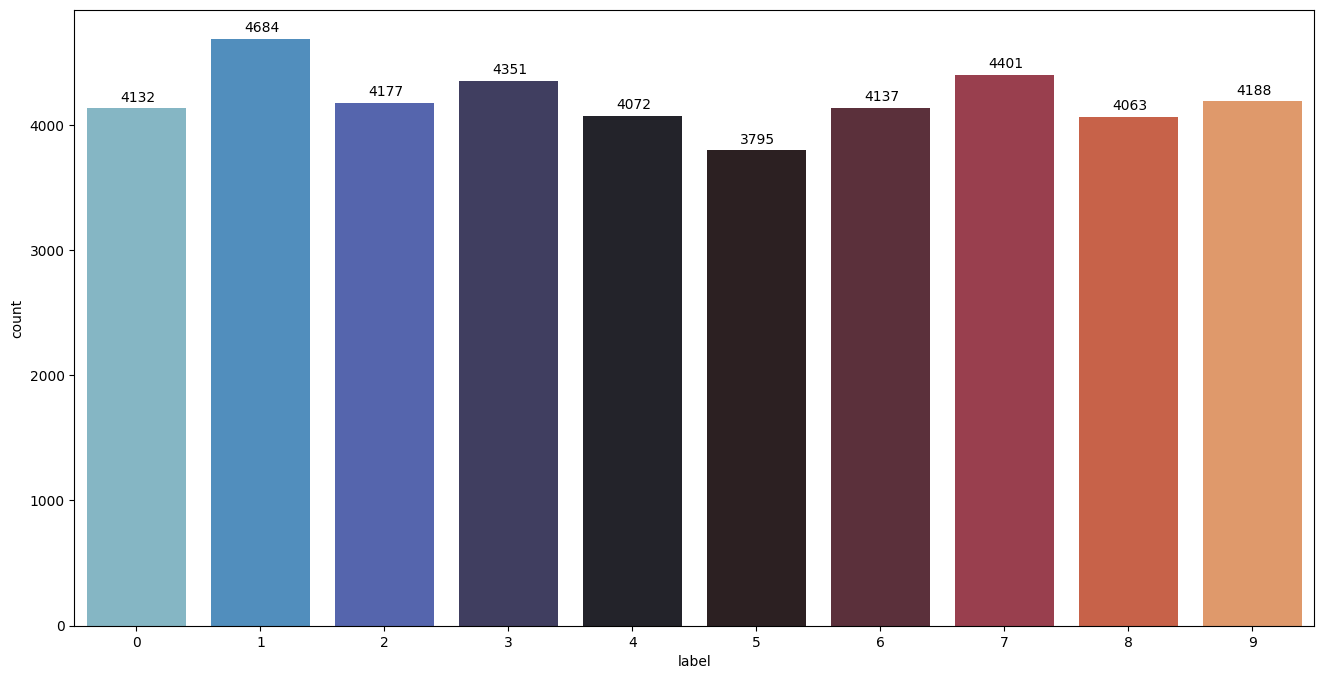

In [ ]:
# Digits classes
fig, ax = plt.subplots(figsize=(16, 8))
graph = sns.countplot(y, x='label', palette='icefire')

for p in graph.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', xy=(p.get_x() + p.get_width() / 2., height),
                xytext=(1, 5), textcoords='offset points', ha='center')
plt.show()

In [ ]:
def thresh_to_black_background(image):
    _, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    if np.sum(binary_image > 127) > image.size / 2:
        binary_image = cv2.bitwise_not(binary_image)
    return binary_image

In [ ]:
X_new = []
for x in X:
    binary_image = thresh_to_black_background(x)
    X_new.append(binary_image)
X_new = np.array(X_new)

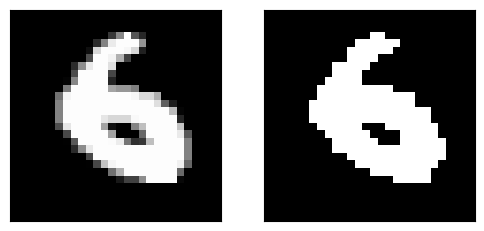

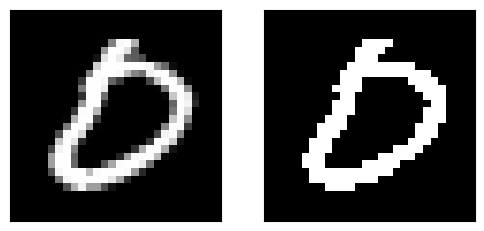

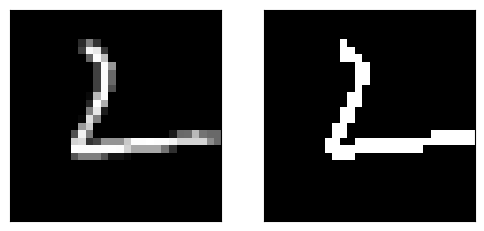

In [ ]:
# Images after process
indices = np.random.randint(0, len(X_new), 3)

for i in indices:
    show([X[i], X_new[i]], 1, 2)

In [ ]:
from keras.utils import to_categorical

# Prepare to X, y for training
X_scaled = X_new.reshape((-1, 28, 28, 1)) / 255.
y_one_hot = to_categorical(y, num_classes=10)

print(X_scaled.shape)
print(y_one_hot.shape)

(42000, 28, 28, 1)
(42000, 10)


In [ ]:
from sklearn.model_selection import train_test_split

# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_one_hot, test_size=0.1, random_state=20030607)

print('Train size:', X_train.shape)
print('Test size:', X_val.shape)

Train size: (37800, 28, 28, 1)
Test size: (4200, 28, 28, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator

model = Sequential([
    Conv2D(filters=16, kernel_size=(5, 5), padding='Same', activation='relu', input_shape=(28, 28, 1)),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(filters=32, kernel_size=(3, 3), padding='Same', activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

optimizer = Adam(learning_rate=0.003, beta_1=0.9, beta_2=0.99)

In [ ]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Data augmentation
data_gen = ImageDataGenerator(
        zca_whitening=False,     # dimension reduction
        rotation_range=5,        # randomly rotate images in the range 5 degrees
        zoom_range = 0.1,        # randomly zoom image 10%
        width_shift_range=0.1,   # randomly shift images horizontally 10%
        height_shift_range=0.1)  # randomly shift images vertically 10%

data_gen.fit(X_train)

In [ ]:
epochs = 50
batch_size = 256

history = model.fit(data_gen.flow(X_train, y_train, batch_size=batch_size), epochs=epochs,
                    validation_data=(X_val, y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/50
147/147 [==============================] - 17s 77ms/step - loss: 0.5727 - accuracy: 0.8125 - val_loss: 0.0959 - val_accuracy: 0.9719
Epoch 2/50
147/147 [==============================] - 11s 75ms/step - loss: 0.1970 - accuracy: 0.9400 - val_loss: 0.0697 - val_accuracy: 0.9786
Epoch 3/50
147/147 [==============================] - 11s 75ms/step - loss: 0.1465 - accuracy: 0.9557 - val_loss: 0.0625 - val_accuracy: 0.9812
Epoch 4/50
147/147 [==============================] - 10s 68ms/step - loss: 0.1289 - accuracy: 0.9614 - val_loss: 0.0420 - val_accuracy: 0.9867
Epoch 5/50
147/147 [==============================] - 10s 70ms/step - loss: 0.1086 - accuracy: 0.9667 - val_loss: 0.0462 - val_accuracy: 0.9855
Epoch 6/50
147/147 [==============================] - 11s 74ms/step - loss: 0.1005 - accuracy: 0.9693 - val_loss: 0.0383 - val_accuracy: 0.9881
Epoch 7/50
147/147 [==============================] - 11s 76ms/step - loss: 0.0948 - accuracy: 0.9714 - val_loss: 0.0391 - val_accuracy:

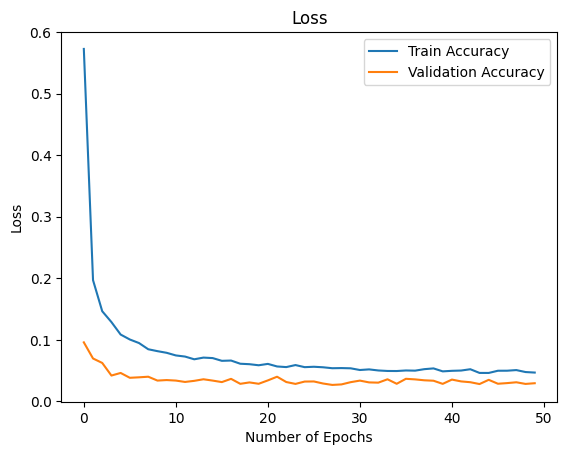

In [ ]:
plt.plot(history.history['loss'], label='Train Accuracy')
plt.plot(history.history['val_loss'], label='Validation Accuracy')
plt.title('Loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

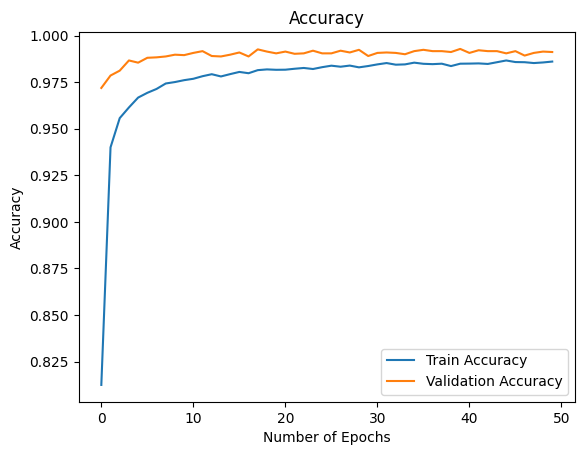

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Save model
model.save('/content/drive/MyDrive/DigitClassification/model.h5')

### Predict

In [ ]:
folder_path = '/content/drive/MyDrive/DigitClassification/PrivateTest'

images = os.listdir(folder_path)
print("The number of images: ", len(images))
print("Some image names:", images[:3])

The number of images:  1390
Some image names: ['01cf4f31eab4d0033cf31a0b4fd98f13  -.jpg', '019c83fa84804eabf41c306b52717cb9  -.png', '018dc36f628ca4eedff4b508d4c4625a  -.jpg']


In [ ]:
def process(image):
    path = os.path.join(folder_path, image)
    x = cv2.imread(path, 0)
    x = cv2.resize(x, (28, 28))
    x = thresh_to_black_background(x)
    return x

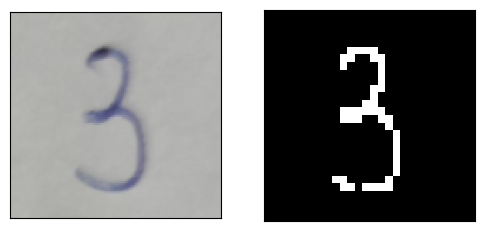

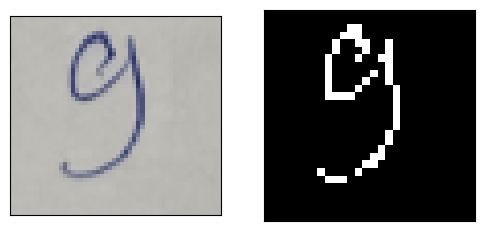

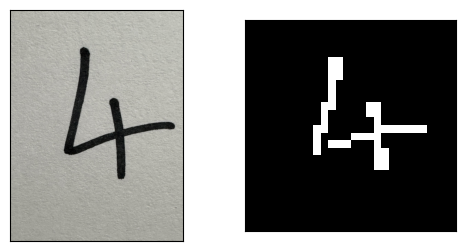

In [ ]:
# Show some images after processing
for image in np.random.choice(images, 3):
    show([os.path.join(folder_path, image), process(image)], 1, 2)

In [ ]:
# DataFrame for csv file
result_df = pd.DataFrame(index=images)
result_df['prediction'] = 0
result_df.head()

,prediction
01cf4f31eab4d0033cf31a0b4fd98f13 -.jpg,0
019c83fa84804eabf41c306b52717cb9 -.png,0
018dc36f628ca4eedff4b508d4c4625a -.jpg,0
1ba599edc95ab3c0572fef8d22b98964 -.jpg,0
01a41c015e1add1f2ca469cbb8e52d5a -.png,0


In [ ]:
from keras.models import load_model

# Load model
model = load_model('/content/drive/MyDrive/DigitClassification/model.h5')

In [ ]:
# Prepare images, predict and save it to dataframe
for image in result_df.index:
    path = os.path.join(folder_path, image)
    x = cv2.imread(path, 0)
    if x is None:
        continue
    x = cv2.resize(x, (28, 28))
    x = thresh_to_black_background(x)
    x = x.reshape(1, 28, 28, 1) / 255.

    # Predict
    pred = model.predict(x)
    pred = np.argmax(pred, axis=1)

    # Save result to dataframe
    result_df.loc[image, 'prediction'] = pred

1/1 [==============================] - 0s 17ms/step


In [ ]:
result_df.head()

,prediction
01cf4f31eab4d0033cf31a0b4fd98f13 -.jpg,5
019c83fa84804eabf41c306b52717cb9 -.png,4
018dc36f628ca4eedff4b508d4c4625a -.jpg,6
1ba599edc95ab3c0572fef8d22b98964 -.jpg,5
01a41c015e1add1f2ca469cbb8e52d5a -.png,3


In [ ]:
# Count the number for each class
result_df.value_counts()

prediction
1             255
7             164
2             163
3             162
5             149
8             117
0             105
4              97
6              92
9              86
Name: count, dtype: int64

In [ ]:
# Save to csv file
output_path = '/content/drive/MyDrive/DigitClassification/output.csv'
with open(output_path, 'w', newline='\r\n') as f:
    result_df.to_csv(f, index_label='image')